### **Import libraries** 

In [2]:
!pip install kafka-python

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from collections import Counter

import time
import pandas as pd
import ast
import json
from kafka import KafkaConsumer


     |████████████████████████████████| 246 kB 32.0 MB/s 


# **Problem 2**

In [3]:
# Load Static data 

train_data = pd.read_csv('/content/iot_static_data.csv') #, skipinitialspace=True

df = pd.DataFrame(train_data)
df = df.sort_index(axis=1)



In [4]:
# some filltaring 
df = df.replace([np.inf, -np.inf], np.nan)
print("count INF and NAN values : ",df.isna().sum().sum())
df = df.dropna()
print("count after: ",df.isna().sum().sum())



# drop those values


count INF and NAN values :  0
count after:  0


In [5]:
df.info()
df.describe(include=object)

df["Class"].value_counts()

df.isnull().sum().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25609 entries, 0 to 25608
Columns: 117 entries, Class to Source
dtypes: float64(115), object(2)
memory usage: 23.1+ MB


0

In [6]:
# apply manual label encoding  
Counter(df.Class)
class_dict = {'BENIGN': 0,
         'gafgyt_combo_attack': 1,
         'gafgyt_junk_attack': 2,
         'gafgyt_scan_attack': 3,
         'gafgyt_tcp_attack': 4,
         'gafgyt_udp_attack': 5,
         'mirai_ack_attack': 6,
         'mirai_scan_attack': 7,
         'mirai_syn_attack': 8,
         'mirai_udp_attack': 9,
         'mirai_udpplain_attack': 10}
df['Class'] = [class_dict[item] for item in df['Class']]



source_dict = {'Danmini Doorbell': 0,
         'Ecobee Thermostat': 1,
         'Ennio Doorbell': 2,
         'Philips B120N10 Baby Monitor': 3,
         'Provision PT 737E Security Camera': 4,
         'Provision PT 838 Security Camera': 5,
         'Samsung SNH 1011 N Webcam': 6,
         'SimpleHome XCS7 1002 WHT Security Camera': 7,
         'SimpleHome XCS7 1003 WHT Security Camera': 8}
 
df['Source'] = [source_dict[item] for item in df['Source']]


Counter(df.Source)


Counter({0: 2602,
         1: 954,
         2: 1701,
         3: 7575,
         4: 2820,
         5: 4557,
         6: 2187,
         7: 2338,
         8: 875})

In [7]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
# df.info()
# df.describe()


In [8]:
# split given data to train and test

x = df.drop('Class', axis=1)
y = df.Class

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **static models**

In [9]:

# Create a Random Forest Classifier
clf = RandomForestClassifier()

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

base_clf_score = accuracy_score(y_pred,y_test) # mean acc on test data
print("Testing accuracy is:", base_clf_score)

print(classification_report(y_test, y_pred))




Testing accuracy is: 0.9990238188207732
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4444
           1       0.00      0.00      0.00         3
           2       0.95      1.00      0.98        63
           3       1.00      1.00      1.00        41
           4       1.00      0.98      0.99        47
           5       0.99      1.00      0.99        79
           6       0.95      1.00      0.98        21
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00       380
          10       0.00      0.00      0.00         1

    accuracy                           1.00      5122
   macro avg       0.81      0.82      0.81      5122
weighted avg       1.00      1.00      1.00      5122



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Create a Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=123)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

base_clf_score = accuracy_score(y_pred,y_test) # mean acc on test data
print("Testing accuracy is:", base_clf_score)

print(classification_report(y_test, y_pred))



Testing accuracy is: 0.9988285825849278
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4444
           1       0.50      0.33      0.40         3
           2       0.97      0.98      0.98        63
           3       1.00      1.00      1.00        41
           4       0.98      0.98      0.98        47
           5       0.99      1.00      0.99        79
           6       0.95      1.00      0.98        21
           7       1.00      0.95      0.98        22
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00       380
          10       0.00      0.00      0.00         1

    accuracy                           1.00      5122
   macro avg       0.85      0.84      0.85      5122
weighted avg       1.00      1.00      1.00      5122



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Create a SVM Classifier

from sklearn import svm
clf_SVM = svm.SVC()

# Train the model using the training sets y_pred=clf.predict(X_test)
clf_SVM.fit(X_train, y_train)

y_pred = clf_SVM.predict(X_test)

base_clf_SVM_score = accuracy_score(y_pred,y_test) # mean acc on test data
print("Testing clf_SVM accuracy is:", base_clf_SVM_score)

print(classification_report(y_test, y_pred))


Testing clf_SVM accuracy is: 0.8734869191721983
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4444
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        63
           3       1.00      0.73      0.85        41
           4       0.00      0.00      0.00        47
           5       0.00      0.00      0.00        79
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00       380
          10       0.00      0.00      0.00         1

    accuracy                           0.87      5122
   macro avg       0.17      0.16      0.16      5122
weighted avg       0.77      0.87      0.82      5122



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## get streaming data with problem 1 configuration

In [12]:
# instantiate the KafkaConsumer Class using the arguments mentioned.
# do not change any arguments other than the first positional argument.
consumer = KafkaConsumer(
    'task2',   # change this to "task2" for the IOT Botnet Detection  ---- important ----
    bootstrap_servers="34.130.121.39:9092",
    sasl_plain_username="student",
    sasl_plain_password="uottawa",
    security_protocol="SASL_PLAINTEXT",
    sasl_mechanism="PLAIN",
    auto_offset_reset='earliest',
    enable_auto_commit=False
)

In [13]:
#get stream data function

def get_kafka_data (stream_limit=150):


  # Data Stream flowing in.
  df = pd.DataFrame()

  cheak_stream_limit = 0
  # stream_limit = 150
  error = 0
  for message in consumer:
      # print(f"Consuming the {cheak_stream_limit+1}th data packet!")
      
      data_packet = message.value
      # print(data_packet)
        
      ##############################################
      try:
        dict_data_packet  = ast.literal_eval(data_packet.decode())#'utf-8'
        df = df.append(dict_data_packet, ignore_index=True )
    
      except:
        stream_limit +=1
        error +=1

      # finally:
      #   print("Number of error is ",error )
    
      # your adaptation logic here #
    
      ##############################################
      
      if cheak_stream_limit == stream_limit:
          break
          
      cheak_stream_limit += 1
  print("Number of error is ",error )

  df = df.sort_index(axis=1)

  return df



# stream and sliding window loop

In [18]:
from sklearn.tree import DecisionTreeClassifier

static_model = clf
adapted_model = DecisionTreeClassifier(random_state=123) 

window_size = 20000 
Data_window = df.iloc[0:window_size,:]
all_pred_Y_static = [] 
all_pred_Y_adapted = [] 

all_True_y = []
count = 0
steps = 100

for step in range(steps):
  time.sleep(5)

  x = Data_window.drop('Class', axis=1)
  y = Data_window.Class

  # static_model.fit(df.drop('Class',axis =1),df.Class)

  adapted_model.fit(x,y)


  stream_data = get_kafka_data(stream_limit=1000)
  stream_data['Class'] = [class_dict[item] for item in stream_data['Class']]
  stream_data['Source'] = [source_dict[item] for item in stream_data['Source']]

  stream_data = stream_data.replace([np.inf, -np.inf], np.nan)
  print("count INF and NAN values : ",stream_data.isna().sum().sum())
  stream_data = stream_data.dropna()
  print("count after: ",stream_data.isna().sum().sum())

  print(np.mean(stream_data.HH_L1_weight))
  print(np.mean(stream_data.HH_L1_magnitude))


  count += len(stream_data)
  #_________________________________ 
  #___ FOR 
  x = stream_data.drop('Class', axis=1)
  y = stream_data.Class

  all_True_y.append (y)
  
  # predict Two models
  pred = list(static_model.predict(x))
  all_pred_Y_static.append (pred)

  pred = list(adapted_model.predict(x))
  all_pred_Y_adapted.append (pred)


  Data_window = pd.concat((Data_window, stream_data), ignore_index = True  ) # Add New data
  Data_window = Data_window.drop(Data_window.index[0:len(stream_data)]) # delete old data


  print(f"Done Step {step}")



# label_dict = { 'BENIGN': 0, 'ATTACK': 1 }
# ds['Label'] = [label_dict[item] for item in ds['Label']]



Number of error is  0
count INF and NAN values :  0
count after:  0
35.338924901587596
189.0351975041065
Done Step 0
Number of error is  0
count INF and NAN values :  0
count after:  0
33.651386145801645
190.65426511699576
Done Step 1
Number of error is  0
count INF and NAN values :  0
count after:  0
42.676450542358324
196.97299329056733
Done Step 2
Number of error is  0
count INF and NAN values :  0
count after:  0
41.044893773760904
197.85145252864618
Done Step 3
Number of error is  0
count INF and NAN values :  0
count after:  0
42.407118832472875
187.2327903781335
Done Step 4
Number of error is  0
count INF and NAN values :  0
count after:  0
41.94086441375735
194.4792763105831
Done Step 5
Number of error is  0
count INF and NAN values :  0
count after:  0
40.50430687434398
196.92986865601463
Done Step 6
Number of error is  0
count INF and NAN values :  0
count after:  0
32.86602101574617
193.7259458306318
Done Step 7
Number of error is  0
count INF and NAN values :  0
count after

# evaluate itiration by accuracy and F1_score and plot calssification Reprot

In [30]:


# len(all_pred_Y)
accuracy_static = []
f1_score_static = []

accuracy_adapted = []
f1_score_adapted = []


for i in range(100):
  True_y = all_True_y[i]

# Astatic evaluation
  pred_y = all_pred_Y_static[i]

  acc = accuracy_score(True_y,pred_y)
  accuracy_static.append(acc)
  f1 = f1_score(True_y,pred_y , average='macro')
  f1_score_static.append(f1)
  print (f"static model f1_score for itiration No. {i} = ",  "{:.2f} %".format(f1*100) )
  print (f"static model accuracy for itiration No. {i} = ",  "{:.2f} %".format(acc*100) )
# Adapted evaluation
  pred_y = all_pred_Y_adapted[i]

  acc = accuracy_score(True_y,pred_y)
  accuracy_adapted.append(acc)
  f1 = f1_score(True_y,pred_y, average='macro')
  f1_score_adapted.append(f1)
  print (f"Adapted model f1_score for itiration No. {i} = ",  "{:.2f} %".format(f1*100) )
  print (f"Adapted model accuracy for itiration No. {i} = ",  "{:.2f} %".format(acc*100))

  print (f"       Classification Report for itiration No. {i} \n ",classification_report(True_y,pred_y))
from collections import Counter

print(Counter(True_y))



static model f1_score for itiration No. 0 =  78.41 %
static model accuracy for itiration No. 0 =  99.70 %
Adapted model f1_score for itiration No. 0 =  87.57 %
Adapted model accuracy for itiration No. 0 =  99.80 %
       Classification Report for itiration No. 0 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       0.00      0.00      0.00         0
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        13
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        73
          10       1.00      1.00      1.00         1

    accuracy                           1.00      1001
   macro avg       0.91      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMe

static model f1_score for itiration No. 14 =  84.91 %
static model accuracy for itiration No. 14 =  99.60 %
Adapted model f1_score for itiration No. 14 =  98.05 %
Adapted model accuracy for itiration No. 14 =  99.80 %
       Classification Report for itiration No. 14 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         7
           4       1.00      0.75      0.86         4
           5       0.95      1.00      0.97        19
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         4
           9       1.00      0.99      0.99        77

    accuracy                           1.00      1001
   macro avg       0.99      0.97      0.98      1001
weighted avg       1.00      1.00      1.00      1001

static model f1_score fo

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

static model f1_score for itiration No. 26 =  96.74 %
static model accuracy for itiration No. 26 =  99.90 %
Adapted model f1_score for itiration No. 26 =  89.09 %
Adapted model accuracy for itiration No. 26 =  99.90 %
       Classification Report for itiration No. 26 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       864
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        17
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00        72
          10       0.00      0.00      0.00         1

    accuracy                           1.00      1001
   macro avg       0.88  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMe

static model f1_score for itiration No. 39 =  98.67 %
static model accuracy for itiration No. 39 =  99.90 %
Adapted model f1_score for itiration No. 39 =  98.67 %
Adapted model accuracy for itiration No. 39 =  99.90 %
       Classification Report for itiration No. 39 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       885
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         7
           4       1.00      0.91      0.95        11
           5       0.89      1.00      0.94         8
           6       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00        68

    accuracy                           1.00      1001
   macro avg       0.99      0.99      0.99      1001
weighted avg       1.00      1.00      1.00      1001

static model f1_score for itiration No. 40 =  93.68 %
static model accuracy fo

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

       Classification Report for itiration No. 51 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00        65
          10       1.00      1.00      1.00         1

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001

static model f1_score for itiration No. 52 =  92.46 %
static model accuracy for itiration No. 52 =  99.60 %
Adapted model f1_score for itiration No. 52 =  93.02 %
Adapted model accuracy fo

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMe

Adapted model f1_score for itiration No. 65 =  86.33 %
Adapted model accuracy for itiration No. 65 =  99.70 %
       Classification Report for itiration No. 65 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       876
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        13
           4       1.00      0.80      0.89         5
           5       0.89      1.00      0.94        17
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        59
          10       0.00      0.00      0.00         1

    accuracy                           1.00      1001
   macro avg       0.86      0.88      0.86      1001
weighted avg       1.00      1.00      1.00      1001

static model f1_score for itiration No. 66 =  90.55 %
static model accuracy fo

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

       Classification Report for itiration No. 78 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00        72
          10       1.00      1.00      1.00         1

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001

static model f1_score for itiration No. 79 =  100.00 %
static model accuracy for itiration No. 79 =  100.00 %
Adapted model f1_score for itiration No. 79 =  100.00 %
Adapted model accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

static model f1_score for itiration No. 89 =  100.00 %
static model accuracy for itiration No. 89 =  100.00 %
Adapted model f1_score for itiration No. 89 =  100.00 %
Adapted model accuracy for itiration No. 89 =  100.00 %
       Classification Report for itiration No. 89 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       849
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00        80

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001

static model f1_scor

## **plot final results**

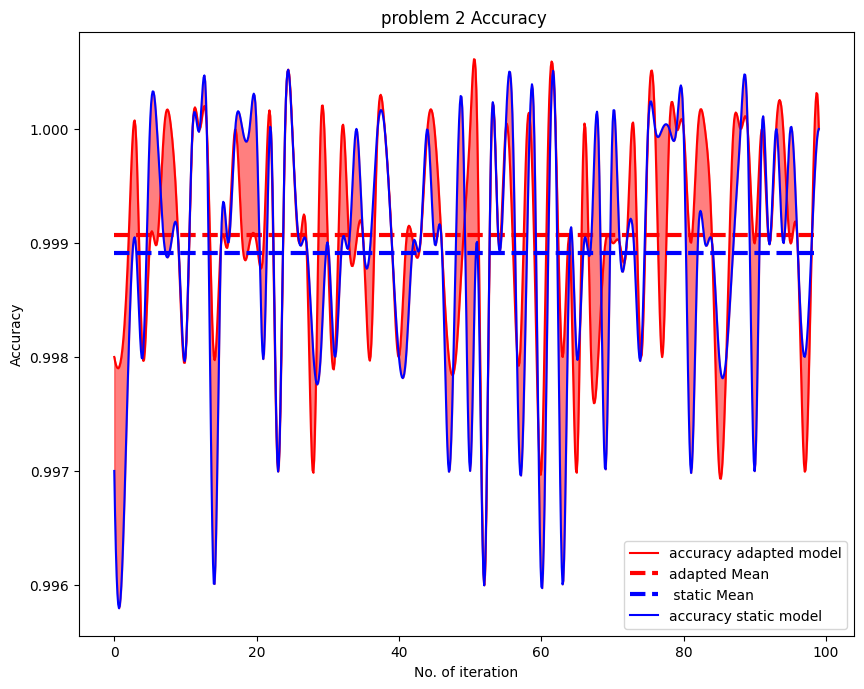

In [28]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.interpolate import make_interp_spline

x_data =  np.array(list(range(100)))

plt.figure(figsize=(10, 8), dpi=100) 

# y_data = accuracy

X_Y_Spline = make_interp_spline(x_data, accuracy_adapted)
X_ = np.linspace(x_data.min(), x_data.max(), 900)
Y_A = X_Y_Spline(X_)

y_mean = [np.mean(accuracy_adapted)]*len(x_data)
plt.plot(X_, Y_A, c='r', label='accuracy adapted model')
plt.plot(x_data, y_mean, c='r', label='adapted Mean', linestyle='--',linewidth=3)
# plt.fill_between(X_, Y_,color='b',alpha=.5)


X_Y_Spline = make_interp_spline(x_data, accuracy_static)
X_ = np.linspace(x_data.min(), x_data.max(), 900)
Y_S = X_Y_Spline(X_)

y_mean = [np.mean(accuracy_static)]*len(x_data)
plt.plot(x_data, y_mean, c='blue', label=' static Mean', linestyle='--',linewidth=3)
plt.plot(X_, Y_S, c='blue', label='accuracy static model')

# plt.plot(x_data, y_mean, c='green', label='Mean', linestyle='--')

# plt.plot(x_func, y_func, label='$f(x) = 0.388 x^2$')
plt.xlabel('No. of iteration')
plt.ylabel('Accuracy')
plt.title('problem 2 Accuracy ')
# plt.ylim(0.994, 1.001)

# plt.fill_between(X_, Y_,color='b',alpha=.5)
plt.fill_between(X_, Y_A, Y_S ,color='r',alpha=.5)


plt.legend()
plt.show()

print("\n")



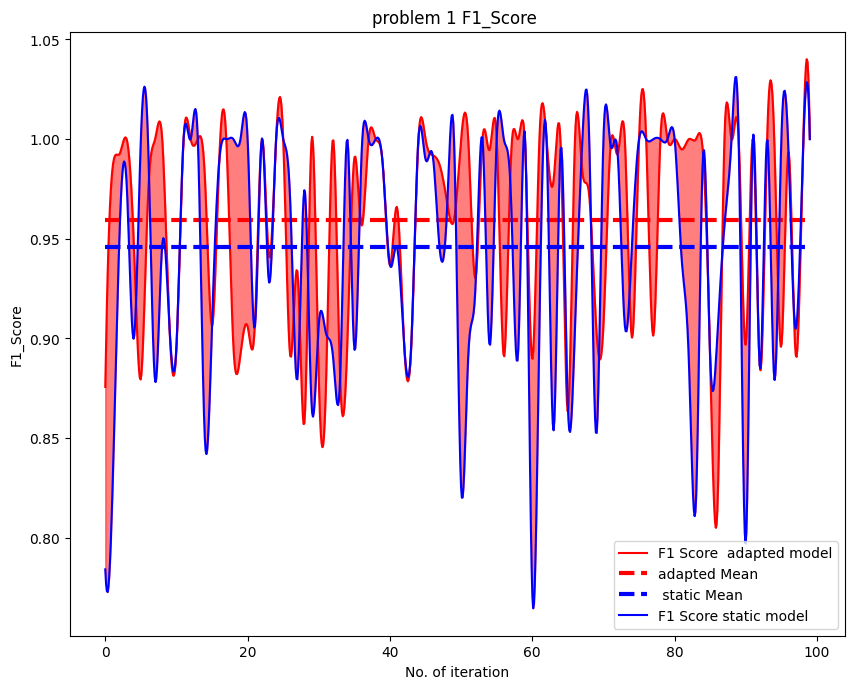

In [29]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.interpolate import make_interp_spline

plt.figure(figsize=(10, 8), dpi=100)

x_data =  np.array(list(range(100)))
# y_data = accuracy

X_Y_Spline = make_interp_spline(x_data, f1_score_adapted)
X_ = np.linspace(x_data.min(), x_data.max(), 900)
Y_A = X_Y_Spline(X_)


y_mean = [np.mean(f1_score_adapted)]*len(x_data)
plt.plot(X_, Y_A, c='r', label='F1 Score  adapted model')
plt.plot(x_data, y_mean, c='r', label='adapted Mean', linestyle='--',linewidth=3)
# plt.fill_between(X_, Y_,color='b',alpha=.5)


X_Y_Spline = make_interp_spline(x_data, f1_score_static)
X_ = np.linspace(x_data.min(), x_data.max(), 900)
Y_S = X_Y_Spline(X_)

y_mean = [np.mean(f1_score_static)]*len(x_data)
plt.plot(x_data, y_mean, c='blue', label=' static Mean', linestyle='--',linewidth=3)
plt.plot(X_, Y_S, c='blue', label='F1 Score static model')

# plt.plot(x_data, y_mean, c='green', label='Mean', linestyle='--')

# plt.plot(x_func, y_func, label='$f(x) = 0.388 x^2$')
plt.xlabel('No. of iteration')
plt.ylabel('F1_Score')
plt.title('problem 1 F1_Score ')
# plt.ylim(0.994, 1.001)

# plt.fill_between(X_, Y_,color='b',alpha=.5)
plt.fill_between(X_, Y_A, Y_S ,color='r',alpha=.5)


plt.legend()
plt.show()

print("\n")

